C[2000]: 6.7 ms
Cython[2000]: 282.3 ms
Python[2000]: 606.9 ms

C[4000]: 25.5 ms
Cython[4000]: 1424.6 ms
Python[4000]: 2581.9 ms

['#D8E3E7', '#51C4D3', '#126E82', '#132C33']
216 227 231
black
81 196 211
black
18 110 130
white
19 44 51
white


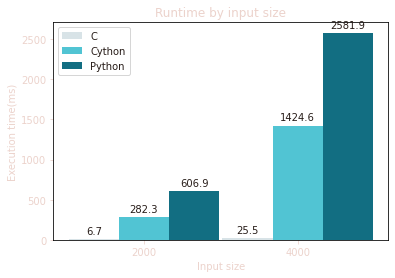

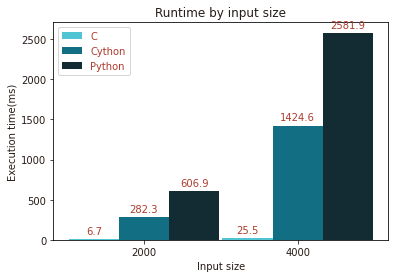

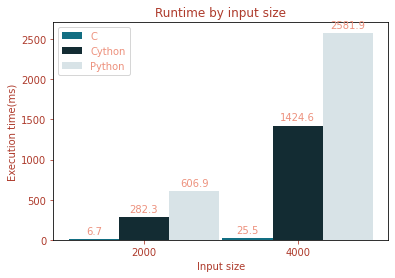

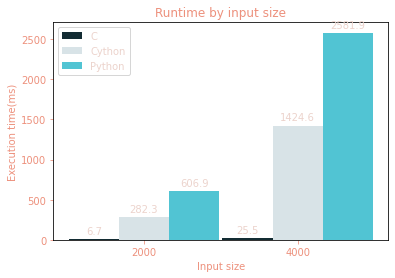

In [3]:
from sort_c import bubblesort_caller
from sort_cython import bubblesort as cy_sort
from sort_python import bubblesort as py_sort

import random
import timeit
import array
import create_plot

def compare_code(n: list,palett):
    t1, t2, t3 = [], [], []
    ms_in_sec = 1000

    for i in n:
        unsort = [random.randint(0, i) for _ in range(i)]

        arr1 = array.array('i', unsort)
        dur = timeit.timeit(
            lambda: bubblesort_caller.c_sort(arr1, i), number=1)
        print(f"C[{i}]:", round(dur * ms_in_sec, 1), "ms")
        t1.append(round(dur * ms_in_sec, 1))

        dur = timeit.timeit(lambda: cy_sort.bubbleSort(arr1), number=1)
        print(f"Cython[{i}]:", round(dur * ms_in_sec, 1), "ms")
        t2.append(round(dur * ms_in_sec, 1))

        dur = timeit.timeit(lambda: py_sort.bubbleSort(unsort), number=1)
        print(f"Python[{i}]:", round(dur * ms_in_sec, 1), "ms")
        t3.append(round(dur * ms_in_sec, 1))
        print()

    create_plot.save_plot(n, ("C", "Cython", "Python"), (t1, t2, t3),palett)


# n = [100, 300, 400, ]
# compare_code(n)
palett = """
#D8E3E7
#51C4D3
#126E82
#132C33
"""
n = [2000,4000
,6000,
]#7000,8000]
compare_code(n,palett)

In [ ]:
2
#0A1931
#F55C47
#FFC947
#EFEFEF
